# Create Database
This is the version that will work on Ubuntu ans assumes that mysql server and pymysql is installed, using
- sudo apt-get install mysql-server
- conda install pymysql

In [2]:
import pymysql as myDB
import pandas as pd

#### Establish the connection and create the cursor

In [3]:
conn = myDB.connect(host='localhost', user='root', password='root') 
cursor = conn.cursor()

#### See what databases exist

In [4]:
sql = ' SHOW DATABASES; '
cursor.execute(sql)
for row in cursor:
    print (row)

('information_schema',)
('classwork',)
('mysql',)
('performance_schema',)
('sys',)


#### Delete the MYFLTDATA database, if it exists

In [5]:
sql = ' DROP DATABASE IF EXISTS MYFLTDATA; ' 
cursor.execute(sql)

/home/drk/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning: (1008, "Can't drop database 'MYFLTDATA'; database doesn't exist")
  result = self._query(query)


0

#### Now create a database named MYFLTDATA

In [6]:
sql = ' CREATE DATABASE MYFLTDATA; ' 
cursor.execute(sql)

1

#### Start using the MYFLTDATA database

In [7]:
sql = ' USE MYFLTDATA; ' 
cursor.execute(sql)

0

#### Now close the connection

In [8]:
cursor.close()

#### Read the flights.csv and weather.csv as pandas data frames

In [9]:
flights = pd.read_csv('flights.csv')
weather = pd.read_csv('weather.csv')

In [10]:
flights.head()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,3,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,4,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,5,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [11]:
flights = flights[['year', 'month', 'day', 'hour', 'origin', 'arr_delay']]
flights.head()

,year,month,day,hour,origin,arr_delay
0,2013,1,1,5,EWR,11.0
1,2013,1,1,5,LGA,20.0
2,2013,1,1,5,JFK,33.0
3,2013,1,1,5,JFK,-18.0
4,2013,1,1,6,LGA,-25.0


In [12]:
weather.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,EWR,2013,1,1,0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0,2012-12-31 19:00:00
1,2,EWR,2013,1,1,1,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0,2012-12-31 20:00:00
2,3,EWR,2013,1,1,2,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0,2012-12-31 21:00:00
3,4,EWR,2013,1,1,3,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0,2012-12-31 22:00:00
4,5,EWR,2013,1,1,4,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0,2012-12-31 23:00:00


In [13]:
weather = weather[['year', 'month', 'day', 'hour', 'origin', 'temp', 'humid', 'wind_speed', 'precip']]
weather.head()

,year,month,day,hour,origin,temp,humid,wind_speed,precip
0,2013,1,1,0,EWR,37.04,53.97,10.35702,0.0
1,2013,1,1,1,EWR,37.04,53.97,13.80936,0.0
2,2013,1,1,2,EWR,37.94,52.09,12.65858,0.0
3,2013,1,1,3,EWR,37.94,54.51,13.80936,0.0
4,2013,1,1,4,EWR,37.94,57.04,14.96014,0.0


#### Clean the two data frames

In [14]:
flights.isnull().sum() 

year            0
month           0
day             0
hour            0
origin          0
arr_delay    9430
dtype: int64

In [15]:
weather.isnull().sum() 

year          0
month         0
day           0
hour          0
origin        0
temp          1
humid         1
wind_speed    3
precip        0
dtype: int64

#### Delete NaNs

In [16]:
flights = flights[pd.notnull(flights['arr_delay'])]
flights.isnull().sum() 

year         0
month        0
day          0
hour         0
origin       0
arr_delay    0
dtype: int64

In [17]:
weather = weather[pd.notnull(weather['temp'])]
weather = weather[pd.notnull(weather['humid'])]
weather = weather[pd.notnull(weather['wind_speed'])]
weather.isnull().sum() 

year          0
month         0
day           0
hour          0
origin        0
temp          0
humid         0
wind_speed    0
precip        0
dtype: int64

#### Save these data frames as csv

In [18]:
flights.to_csv('flightsb.csv', index=False, quoting=1)
weather.to_csv('weatherb.csv', index=False, quoting=1)

In [19]:
cursor.close()

In [20]:
conn = myDB.connect(host='localhost', user='root', password='root', db='MYFLTDATA', local_infile=True) 
cursor = conn.cursor()

In [21]:
sql = '''
DROP TABLE IF EXISTS flights
'''
cursor.execute(sql)

/home/drk/anaconda3/lib/python3.6/site-packages/pymysql/cursors.py:166: Warning: (1051, "Unknown table 'MYFLTDATA.flights'")
  result = self._query(query)


0

#### Save flights and weather as SQL tables in the MYFLTDATA database

In [22]:
sql = '''
        CREATE TABLE flights (
            year CHAR(4),
            month CHAR(4),
            day CHAR(4),
            hour CHAR(2),
            origin CHAR(3),
            arr_delay DECIMAL(10 , 2 )
        );
    '''

In [23]:
cursor.execute(sql)

0

Reference for insert -- http://www.mysqltutorial.org/import-csv-file-mysql-table/

In [24]:
sql = '''
        LOAD DATA LOCAL INFILE 'flightsb.csv' 
        INTO TABLE flights 
        FIELDS TERMINATED BY ',' 
        ENCLOSED BY '"'
        LINES TERMINATED BY '\n'
        IGNORE 1 ROWS;
    '''

In [25]:
cursor.execute(sql)

327346

In [26]:
sql = '''
   SELECT * FROM flights LIMIT 5
'''

In [27]:
cursor.execute(sql)
for row in cursor.fetchall():
    print (row)

('2013', '1', '1', '5', 'EWR', Decimal('11.00'))
('2013', '1', '1', '5', 'LGA', Decimal('20.00'))
('2013', '1', '1', '5', 'JFK', Decimal('33.00'))
('2013', '1', '1', '5', 'JFK', Decimal('-18.00'))
('2013', '1', '1', '6', 'LGA', Decimal('-25.00'))


In [28]:
sql = '''
        CREATE TABLE weather (
            year CHAR(4),
            month CHAR(4),
            day CHAR(4),
            hour CHAR(2),
            origin CHAR(3),
            temp DECIMAL(5 , 2 ),
            humid DECIMAL(5 , 2 ),
            wind_speed DECIMAL(10 , 5 ),
            precip DECIMAL(5 , 2 )
        );
    '''

In [29]:
cursor.execute(sql)

0

In [30]:
sql = '''
        LOAD DATA LOCAL INFILE 'weatherb.csv' 
        INTO TABLE weather 
        FIELDS TERMINATED BY ',' 
        ENCLOSED BY '"'
        LINES TERMINATED BY '\n'
        IGNORE 1 ROWS;
    '''

In [ ]:
cursor.execute(sql)

In [32]:
sql = '''
   SELECT * FROM weather LIMIT 5
'''

In [33]:
cursor.execute(sql)
for row in cursor.fetchall():
    print (row)

('2013', '1', '1', '0', 'EWR', Decimal('37.04'), Decimal('53.97'), Decimal('10.35702'), Decimal('0.00'))
('2013', '1', '1', '1', 'EWR', Decimal('37.04'), Decimal('53.97'), Decimal('13.80936'), Decimal('0.00'))
('2013', '1', '1', '2', 'EWR', Decimal('37.94'), Decimal('52.09'), Decimal('12.65858'), Decimal('0.00'))
('2013', '1', '1', '3', 'EWR', Decimal('37.94'), Decimal('54.51'), Decimal('13.80936'), Decimal('0.00'))
('2013', '1', '1', '4', 'EWR', Decimal('37.94'), Decimal('57.04'), Decimal('14.96014'), Decimal('0.00'))


#### Now to join on year, month, day, hour and origin
- This command sequence creates a temporary table
- The temporary table will be valid as long as the connection exists
- Depending on your installation and setup, this may or may not work and in any case may take a long time.
- So the next five cells are a little shaky

In [36]:
sql = '''
    CREATE TEMPORARY TABLE fltweather AS ( 
        SELECT flights.year, flights.month, flights.day, flights.hour, flights.origin,
               weather.temp, weather.humid, weather.wind_speed, weather.precip
        FROM flights
        LEFT JOIN weather on flights.year = weather.year 
            AND flights.month = weather.month
            AND flights.day = weather.day
            AND flights.hour = weather.hour
            AND flights.origin = weather.origin
    );
'''

In [ ]:
cursor.execute(sql)

In [38]:
sql = '''
   SELECT * FROM fltweather LIMIT 5
'''

In [39]:
cursor.execute(sql)
for row in cursor.fetchall():
    print (row)

In [ ]:
cursor.close()

In [41]:
fltweather = pd.merge(flights, weather, how='left', on=['year', 'month', 'day', 'hour', 'origin'])

In [44]:
fltweather.head()

,year,month,day,hour,origin,arr_delay,temp,humid,wind_speed,precip
0,2013,1,1,5,EWR,11.0,NaN,NaN,NaN,NaN
1,2013,1,1,5,LGA,20.0,NaN,NaN,NaN,NaN
2,2013,1,1,5,JFK,33.0,NaN,NaN,NaN,NaN
3,2013,1,1,5,JFK,-18.0,NaN,NaN,NaN,NaN
4,2013,1,1,6,LGA,-25.0,39.92,57.33,13.80936,0.0


#### Select all flights that departed from JFK that were delayed in departure by more than 10 hours and store them in a separate table called “mydelay”

In [54]:
mydelay = fltweather[(fltweather['origin'] == 'JFK') & (fltweather['arr_delay'] > 10)]

In [55]:
mydelay.head()

,year,month,day,hour,origin,arr_delay,temp,humid,wind_speed,precip
2,2013,1,1,5,JFK,33.0,NaN,NaN,NaN,NaN
26,2013,1,1,6,JFK,14.0,39.02,59.37,12.65858,0.0
52,2013,1,1,6,JFK,11.0,39.02,59.37,12.65858,0.0
69,2013,1,1,7,JFK,44.0,39.02,59.37,11.50780,0.0
112,2013,1,1,8,JFK,12.0,39.92,59.50,14.96014,0.0


In [64]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings(action='once')

#### Get rid of all the NaNs

In [65]:
warnings.filterwarnings('ignore')
mydelay = mydelay.dropna()

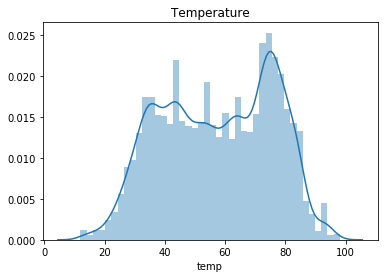

In [67]:
ax = plt.axes()
sns.distplot(mydelay['temp'], ax=ax)
ax.set_title('Temperature')

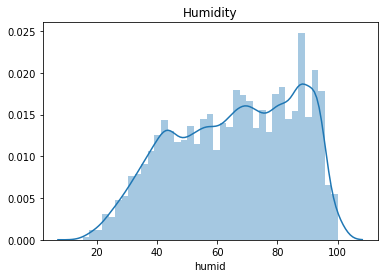

In [68]:
ax = plt.axes()
sns.distplot(mydelay['humid'], ax=ax)
ax.set_title('Humidity')

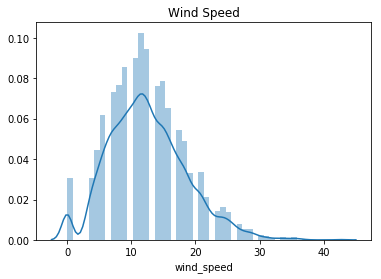

In [69]:
ax = plt.axes()
sns.distplot(mydelay['wind_speed'], ax=ax)
ax.set_title('Wind Speed')

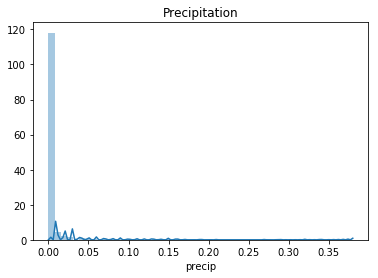

In [70]:
ax = plt.axes()
sns.distplot(mydelay['precip'], ax=ax)
ax.set_title('Precipitation')

In [71]:
mydelayweather = mydelay[['temp', 'humid', 'wind_speed', 'precip']]
mydelayweather.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
temp,29364.0,57.460664,18.431927,12.02,42.08000,57.9200,73.94000,98.06000
humid,29364.0,65.799070,20.148121,15.21,49.62000,67.5400,83.32000,100.00000
wind_speed,29364.0,12.519808,6.007467,0.00,8.05546,11.5078,16.11092,42.57886
precip,29364.0,0.005089,0.024952,0.00,0.00000,0.0000,0.00000,0.38000


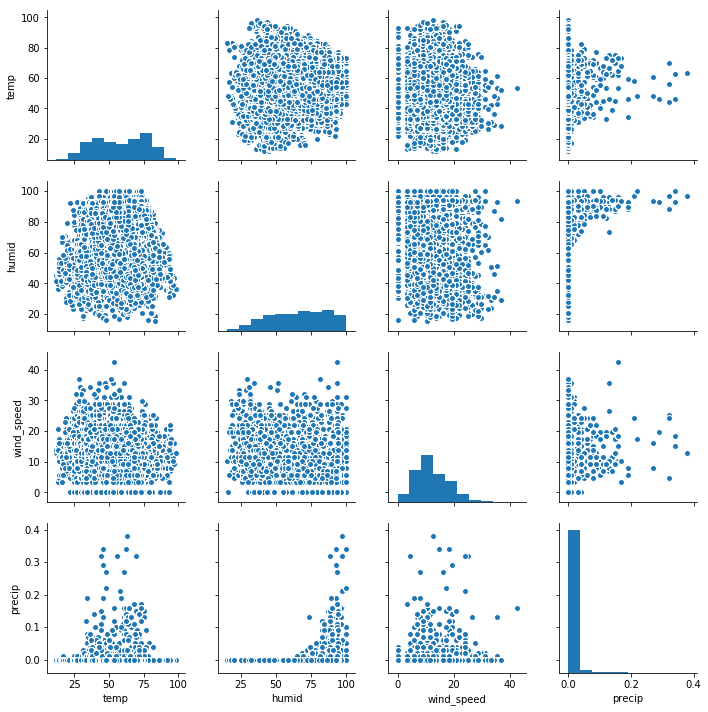

In [74]:
sns.pairplot(mydelayweather)